# Problem conceptualization

**Develop an income classifier for individuals with reduced no. of variables.**

Classify the income as less than or wqual to 50,000 and greater than 50,000.

# Problem characterization

**Classifiaction**

# Method Identification

- Logistic Regression

- Random Forest

- K Nearest Neighbors


## Importing the required packages

In [1]:
import os
#to work with df
import pandas as pd
#to perform numerical operations
import numpy as np
#to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
#to partition the data into train and test
from sklearn.model_selection import train_test_split
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression
# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier  
#importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

## Importing data

In [2]:
os.chdir('F:/DS tut/datasets')

In [3]:
data_income = pd.read_csv('income.csv')

In [4]:
#creating a copy of original data
data = data_income.copy()

## EDA

1. Getting to know the data

2. Data preprocessing (missing values)

3. Cross tables and data visualization

### Getting to know the data

In [5]:
#check dtypes of vars
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [6]:
#checking for missing values
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

**_No missing values!_**

In [8]:
#summary of te numerical vars
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [9]:
#summary of categorical vars
summary_cate = data.describe(include="O")
#include="O" (capital o, O represnts object)
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [10]:
#frequency of each category
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [11]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

There are some missing values not in the form of NaN but in the form of '?'.

In [12]:
#checking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


There exists ' ?' instead of NaN. This whole thing is a missing value.

Go back and read the data by including "na_values[' ?']" to consider ' ?' as NaN.

In [13]:
data = pd.read_csv('income.csv', na_values=[" ?"])

## Data pre-processing

In [14]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [15]:
missing = data[data.isnull().any(axis=1)]

In [16]:
#remove all the rows with missing values
data2 = data.dropna(axis=0)

In [17]:
data3 = data2.copy()

In [18]:
data4 = data3.copy()

In [19]:
#relationship betn independent varaibles
correlation = data2.corr()

## Cross tables and Data visualization 

In [20]:
#extracting the coun names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [21]:
#gender proportion table
gender = pd.crosstab(index = data2["gender"], #rows
                    columns = 'count', #columns
                    normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [22]:
#gender vs salary status
gender_salstat = pd.crosstab(index = data2["gender"], #rows
                            columns = data2["SalStat"], #columns
                            margins = True,
                            normalize = 'index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


### Frequency distribution of 'Salary Status'

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


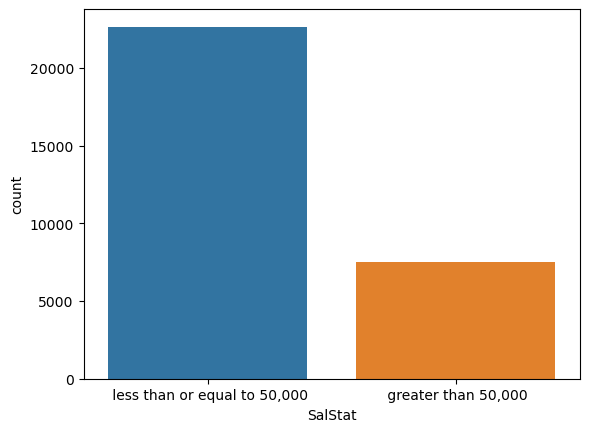

In [23]:
SalStat = sns.countplot(data2['SalStat'])
plt.show()

75% of people's salary status is <=50,000

25% of people's salary status is >50,000

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


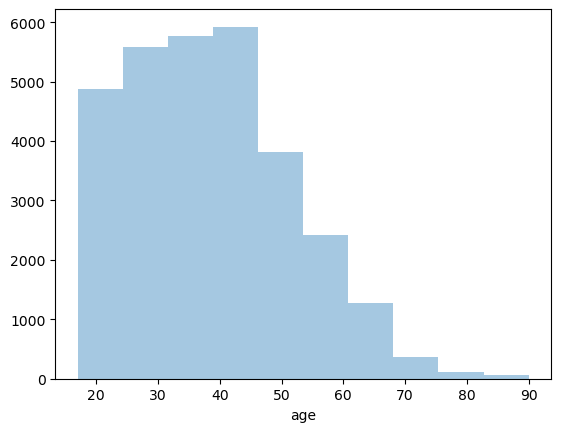

In [24]:
#histogram of age
sns.distplot(data2['age'], bins=10, kde=False)
plt.show()

People with age 20-45 are high in frequency

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


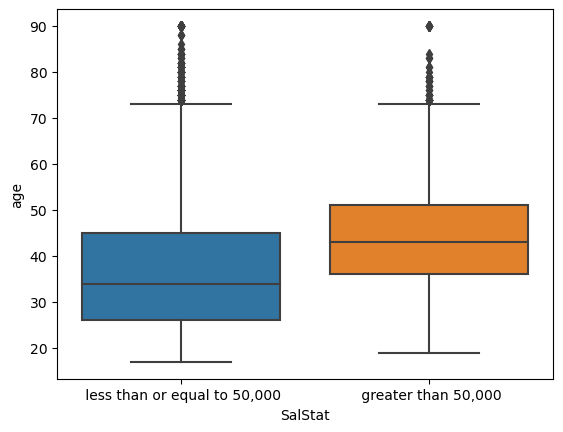

In [25]:
#box plot - age vs salary status
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()
plt.show()

people with 35-50 age are more likely to earn > 50000 USD p.a

people with 25-35 age are more likely to earn <= 50000 USD p.a

In [26]:
#*** Job Type
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


In [27]:
#*** Education
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


In [28]:
#*** Occupation
Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


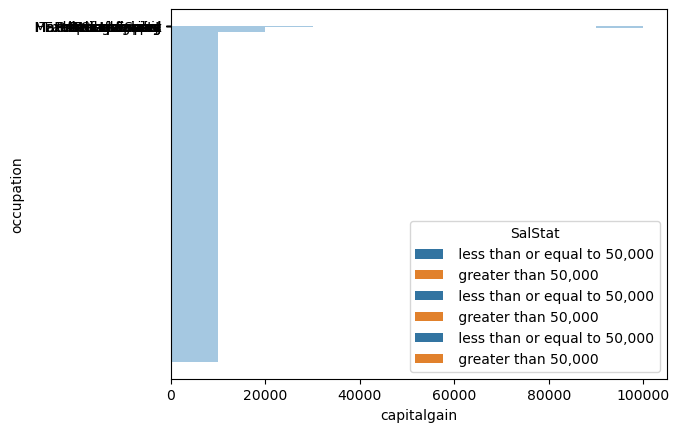

In [29]:
#*** Capital gain
sns.distplot(data2['capitalgain'], bins = 10, kde = False)
plt.show()

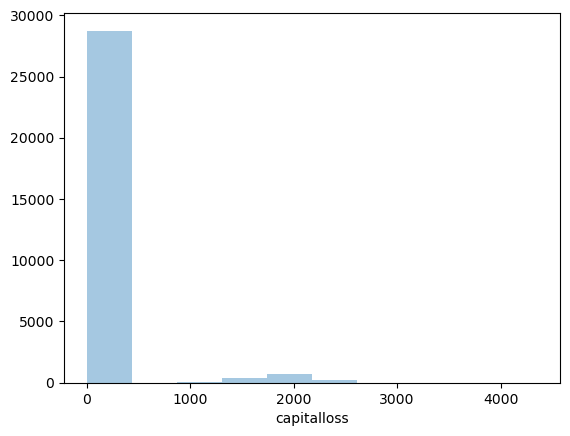

In [30]:
#*** Capital loss
sns.distplot(data2['capitalloss'], bins = 10, kde = False)
plt.show()

# LOGISTIC REGRESSION

In [31]:
# Reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


<ipython-input-31-30e941eeb510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [32]:
new_data = pd.get_dummies(data2, drop_first=True)

In [33]:
#storing cols names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [34]:
#seperating the input names from data
features = list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ Germany', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ Nicaragua', 'nativecountry_ Thailand', 'JobType_ State-gov', 'nativecountry_ France', 'nativecountry_ Vietnam', 'nativecountry_ India', 'race_ Asian-Pac-Islander', 'nativecountry_ China', 'nativecountry_ Japan', 'nativecountry_ Portugal', 'maritalstatus_ Never-married', 'EdType_ 11th', 'relationship_ Other-relative', 'nativecountry_ Scotland', 'occupation_ Handlers-cleaners', 'relationship_ Own-child', 'JobType_ Local-gov', 'nativecountry_ Cuba', 'occupation_ Other-service', 'race_ Other', 'nativecountry_ Jamaica', 'EdType_ Masters', 'nativecountry_ Columbia', 'relationship_ Unmarried', 'occupation_ Craft-repair', 'occupation_ Priv-house-serv', 'nativecountry_ Haiti', 'race_ White', 'nativecountry_ Italy', 'maritalstatus_ Separated', 'nativecountry_ Yugoslavia', 'nativecountry_ United-States', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Honduras', 'EdType_ Doctorate', 'age', 'EdType_ HS-grad', '

In [35]:
#storing the output values
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [36]:
#storing the values from input features
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [37]:
#splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=0)

In [38]:
#make an instance of the model
logistic = LogisticRegression()

In [39]:
#fitting the values for  and y
logistic.fit(train_x, train_y)

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
logistic.coef_

array([[ 1.45414711e-02, -5.83612051e-02, -1.28846602e-02,
        -3.33853000e-03, -1.26808124e-01,  5.71011290e-03,
        -3.36923946e-02, -2.02944902e-02, -1.17949705e-01,
        -2.24423020e-02, -4.78368550e-04, -1.37336965e-02,
        -1.34693023e+00, -3.04411534e-01, -2.44464904e-01,
        -3.29578370e-03, -3.39110182e-01, -9.40994545e-01,
        -2.48098038e-01, -8.19534072e-03, -7.40446351e-01,
        -8.39797020e-02, -1.19762972e-02,  5.26494975e-01,
        -2.01967359e-02, -5.75435497e-01, -3.21734346e-01,
        -4.06251646e-02, -1.18282071e-02, -3.25363837e-01,
        -1.86567648e-03, -1.79333343e-01, -5.22129386e-04,
        -4.24895023e-01, -8.91607888e-04, -2.24519869e-03,
         2.48402606e-01,  4.36903611e-04, -9.34988425e-01,
        -3.50559783e-01, -3.90178826e-01, -1.93992875e-03,
        -3.88133161e-03,  1.95136067e-03, -1.26407461e-03,
        -2.65507381e-02,  2.33886385e-01,  1.61499745e-01,
        -3.95484809e-01,  1.64338788e-01,  9.81377392e-0

In [41]:
logistic.intercept_

array([-1.04058553])

In [42]:
#prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [43]:
#confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6291  532]
 [ 946 1280]]


In [44]:
#calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8366670350314952


In [45]:
# Printing the misclassified values from prediction

print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1478


**In the above model, we found that there are some insignificant variables which are contributing to the prediction.**

**So now we will build another model, by removing the insignificant variables.**

# LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES 

In [46]:
#reindexing the salary status names to 0, 1
data3['SalStat'] = data3['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [47]:
cols = ['gender', 'nativecountry', 'race', 'JobType']

In [48]:
new_data = data3.drop(cols, axis=1)

In [49]:
new_data = pd.get_dummies(new_data, drop_first=True) 

In [50]:
#storing the col names
columns_list2 = list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [51]:
#seperating the input names from data
features2 = list(set(columns_list2)-set(['SalStat']))
print(features2)

['EdType_ Prof-school', 'maritalstatus_ Married-spouse-absent', 'EdType_ Some-college', 'occupation_ Sales', 'EdType_ Assoc-acdm', 'relationship_ Wife', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'capitalloss', 'maritalstatus_ Never-married', 'EdType_ 11th', 'maritalstatus_ Widowed', 'relationship_ Other-relative', 'EdType_ Preschool', 'capitalgain', 'relationship_ Not-in-family', 'occupation_ Handlers-cleaners', 'EdType_ 7th-8th', 'hoursperweek', 'EdType_ Assoc-voc', 'relationship_ Own-child', 'occupation_ Transport-moving', 'occupation_ Other-service', 'maritalstatus_ Married-AF-spouse', 'EdType_ Masters', 'occupation_ Craft-repair', 'relationship_ Unmarried', 'occupation_ Priv-house-serv', 'occupation_ Tech-support', 'maritalstatus_ Separated', 'occupation_ Protective-serv', 'EdType_ Doctorate', 'age', 'EdType_ HS-grad', 'maritalstatus_ Married-civ-spouse', 'EdType_ 1st-4th', 'occupation_ Farming-fishing', 'occupation_ Machine-op-inspct', 'occupation_ Armed-Forces'

In [52]:
#storing output values in y
y2 = new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [53]:
#storing the values from input features
x2 = new_data[features2].values
print(x2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [54]:
#splitting the data into train and test
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [55]:
#make an instance of the model
logistic2 = LogisticRegression()

In [56]:
#fitting the values
logistic2.fit(train_x2, train_y2)

C:\Users\tanvi\Desktop\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
#prediction from test data
prediction2 = logistic2.predict(test_x2)
print(prediction2)

[0 0 0 ... 0 0 0]


In [58]:
accuracy = accuracy_score(test_y2, prediction2)
print(accuracy)

TypeError: 'numpy.float64' object is not callable

In [ ]:
#printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())